In [27]:
import keras
from keras.datasets import california_housing

In [28]:
(train_features,train_labels),(test_features,test_labels) = california_housing.load_data(version='small')

In [29]:
mean = train_features.mean(axis=0)
std = train_features.std(axis=0)
xtrain = (train_features-mean) / std
xtest = (test_features - mean) / std

In [30]:
ytrain = train_labels/100000
ytest = test_labels/100000

In [31]:
from keras import layers
def get_model():
    model = keras.Sequential([
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1),
    ])

    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['mean_absolute_error'],
    )
    return model

In [32]:
#implementing k fold cross validation
import numpy as np
n_epochs = 200
n_folds = 4
all_scores = []
num_val_samples = len(xtrain)//n_folds
for i in range(n_folds):
    print(f'executing fold {i+1}')
    x_val = xtrain[i*num_val_samples : (i+1) * num_val_samples]
    y_val = ytrain[i*num_val_samples : (i+1) * num_val_samples]
    x_train = np.concatenate(
        [xtrain[: i * num_val_samples], xtrain[(i + 1) * num_val_samples :]],
        axis=0,
    )
    y_train = np.concatenate(
        [ytrain[: i * num_val_samples], ytrain[(i + 1) * num_val_samples :]],
        axis=0,
    )

    model = get_model()
    history = model.fit(
        x_train,y_train,epochs=n_epochs,batch_size=16,verbose=0,validation_data=(x_val,y_val)
    )
    all_scores.append(history.history['val_mean_absolute_error'])

executing fold 1
executing fold 2
executing fold 3
executing fold 4


In [33]:
average_mae_history = [
    np.mean([x[i] for x in all_scores]) for i in range(n_epochs)
]

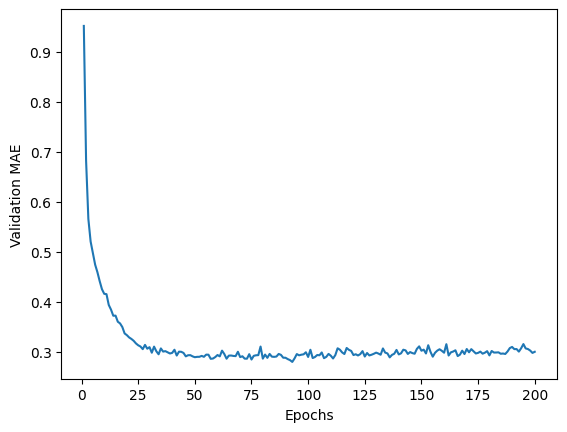

In [34]:
import matplotlib.pyplot as plt
epochs = range(1, len(average_mae_history) + 1)
plt.plot(epochs, average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

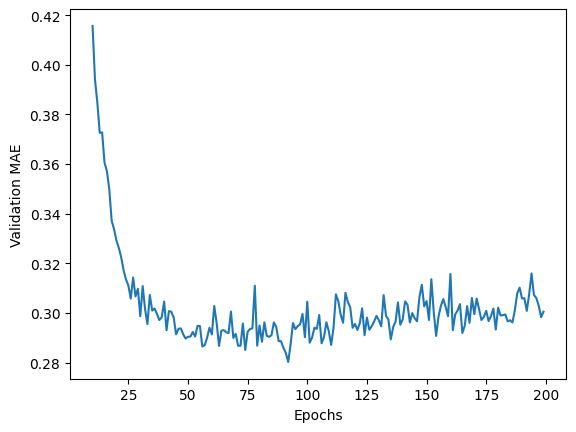

In [35]:
truncated_mae_history = average_mae_history[10:]
epochs = range(10, len(truncated_mae_history) + 10)
plt.plot(epochs, truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [36]:

model_final = get_model()

model_final.fit(xtrain, ytrain, epochs=130, batch_size=16, verbose=0)
test_mean_squared_error, test_mean_absolute_error = model_final.evaluate(
    xtest, ytest
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3017 - mean_absolute_error: 0.3168 


In [37]:
round(test_mean_absolute_error,3)

0.317